In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_data = keras.utils.image_dataset_from_directory(
    directory='Cat-Dog-CNN-Classifier-master/train/',
    batch_size=32,
    image_size=(64, 64),
    shuffle=False)
val_data = keras.utils.image_dataset_from_directory(
    directory='Cat-Dog-CNN-Classifier-master/test/',
    batch_size=32,
    image_size=(64, 64),
    shuffle=False)
# print(train_data.class_names)

Found 23000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model
classifier = load_model('Cat-Dog-CNN-Classifier-master/resources/dogcat_model_bak.h5')

### Working gradient-getter

tf.Tensor([[0.9999716]], shape=(1, 1), dtype=float32)
tf.Tensor(-0.00015908024, shape=(), dtype=float32) tf.Tensor(0.00012546097, shape=(), dtype=float32)


C:\Users\phili\AppData\Local\Temp\ipykernel_17000\4271042238.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)


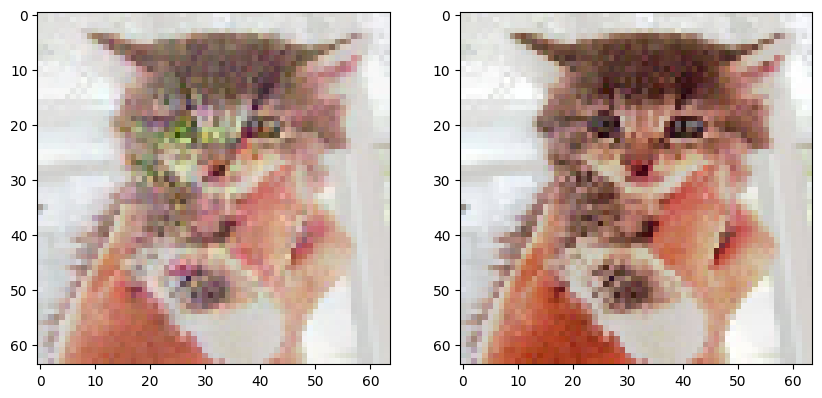

In [108]:
%matplotlib inline
from tensorflow.keras.preprocessing import image
plt.figure(figsize=(10, 10))

def normalize_image(img):
    img = img - tf.reduce_min(img)
    assert(tf.reduce_max(img) != 0)
    return img / tf.reduce_max(img)

img_path = 'Cat-Dog-CNN-Classifier-master/test/Cat/cat.100.jpg'
# img_path = 'own-imgs/cat/01_cat.webp'
# img_path = 'own-imgs/dog/02_catlike_dog.jpg'
# img_path = 'own-imgs/dog/01_yuki.jpg'
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = tf.expand_dims(img, axis=0)
plt.imshow(img[0])

result = classifier(img)
print(result)
with tf.GradientTape() as tape:
  tape.watch(img)
  prediction = classifier(img)
  # loss_value = loss_fun(target, prediction)
grads = tape.gradient(prediction, img)
# print(grads.shape, img.shape)
print(tf.reduce_min(grads), tf.reduce_max(grads))
grads = normalize_image(grads)
# grads = normalize_image(grads[0])
# print(grads)
ax = plt.subplot(1, 2, 1)
plt.imshow(normalize_image(-grads[0] + 1.5*img[0]))
ax = plt.subplot(1, 2, 2)
plt.imshow(normalize_image(img[0]))
# print(grads.shape)

tf.Tensor([[0.9999716]], shape=(1, 1), dtype=float32)
tf.Tensor(-0.00015908024, shape=(), dtype=float32) tf.Tensor(0.00012546097, shape=(), dtype=float32)
tf.Tensor([[7.401035e-14]], shape=(1, 1), dtype=float32)


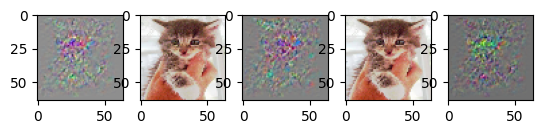

In [119]:
%matplotlib inline
from tensorflow.keras.preprocessing import image

def normalize_image(img):
    img = img - tf.reduce_min(img)
    assert(tf.reduce_max(img) != 0)
    return img / tf.reduce_max(img)

img_path = 'Cat-Dog-CNN-Classifier-master/test/Cat/cat.100.jpg'
# img_path = 'own-imgs/cat/01_cat.webp'
# img_path = 'own-imgs/dog/02_catlike_dog.jpg'
# img_path = 'own-imgs/dog/01_yuki.jpg'
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = tf.expand_dims(img, axis=0)
print(classifier(img))

ax = plt.subplot(1, 5, 1)
with tf.GradientTape() as tape:
  tape.watch(img)
  prediction = classifier(img)
  # loss_value = loss_fun(target, prediction)
grads0 = tape.gradient(prediction, img)
# print(grads.shape, img.shape)
print(tf.reduce_min(grads0), tf.reduce_max(grads0))
plt.imshow(normalize_image(grads0[0]))

for i in range(100):
  result = classifier(img)
  with tf.GradientTape() as tape:
    tape.watch(img)
    prediction = classifier(img)
  grads = tape.gradient(prediction, img)
  img = normalize_image(-grads + 2 * img)
print(classifier(img))
ax = plt.subplot(1, 5, 2)
plt.imshow(normalize_image(img[0]))

ax = plt.subplot(1, 5, 3)
plt.imshow(normalize_image(grads[0]))

ax = plt.subplot(1, 5, 4)
img1 = image.load_img(img_path, target_size=(64, 64))
img1 = image.img_to_array(img1)
img1 = img1/255
img1 = tf.expand_dims(img1, axis=0)
plt.imshow(image.img_to_array(img1[0]))

ax = plt.subplot(1, 5, 5)
plt.imshow(normalize_image(grads[0] - grads0[0]))